In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import csv


# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_file = pd.read_csv(mouse_drug_data_to_load)
trial_file = pd.read_csv(clinical_trial_data_to_load)

df_mouse = pd.DataFrame(mouse_file)
df_clin_trial = pd.DataFrame(trial_file)

In [2]:
#df_mouse.head()

In [3]:
#df_clin_trial.head()

In [4]:
# Combine Dataframes
new_df_mouse = pd.merge(df_mouse,df_clin_trial, on = "Mouse ID")
new_df_mouse.head(3)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0


In [5]:
new_df_mouse.groupby("Drug")["Timepoint"].count()
#new_df_mouse
df_drug_time = new_df_mouse.drop(['Mouse ID','Metastatic Sites'], axis = 1)

drug_time = df_drug_time.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
drug_time.to_frame()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [6]:

# df_drug_time['TumVol StDev']=df_drug_time.std(axis=1)/np.sqrt(1906)
# df_drug_final=df_drug_time.drop(['TumVol StDev'], axis=1)

error_TV_df = df_drug_time.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

error_TV_df.to_frame()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [7]:
# Minor Data Munging to Re-Format the Data Frames
Drug_final = drug_time.unstack(level = 0)
Drug_final

# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [8]:
Error_TV_final = error_TV_df.unstack(level = 0)
Error_TV_final

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


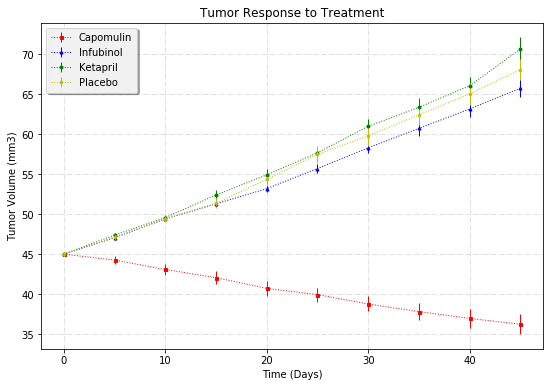

In [9]:

fig= plt.figure(figsize=(9,6))
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(linestyle='-.', color = '0.85')


plt.errorbar(Drug_final.index, Drug_final["Capomulin"],yerr=Error_TV_final["Capomulin"],color="r", marker="s", markersize=3, linestyle="dotted", linewidth=1)
plt.errorbar(Drug_final.index, Drug_final["Infubinol"], yerr=Error_TV_final["Infubinol"], color="b", marker="^", markersize=3, linestyle="dotted", linewidth=1)
plt.errorbar(Drug_final.index, Drug_final["Ketapril"], yerr=Error_TV_final["Ketapril"], color="g", marker="o", markersize=3, linestyle="dotted", linewidth=1)
plt.errorbar(Drug_final.index, Drug_final["Placebo"], yerr=Error_TV_final["Placebo"], color="y", marker="d", markersize=3, linestyle="dotted", linewidth=1)
             
plt.legend(("Capomulin", "Infubinol","Ketapril", "Placebo"),fancybox=True, framealpha=.85, shadow=True, borderpad=.5)

# fig, ax = plt.subplots()
# ax.plot()
# ax.xaxis.grid(True, which='minor')
# ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# Save the Figure
plt.savefig("Fig1_Pymaceut_HMWRK.png")

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
new_df_mouse.groupby("Drug")["Timepoint"].count()
df_metastatic_response = new_df_mouse.groupby(["Drug", "Timepoint"])
df_metastatic_final = df_metastatic_response["Metastatic Sites"].mean()
df_metastatic_final.to_frame()

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [11]:
# Store the Std Err Met. Site Data Grouped by Drug and Timepoint 

Error_MS_df = new_df_mouse.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
sem_MS_df = Error_MS_df
sem_MS_df.to_frame()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [12]:
# Minor Data Munging to Re-Format the Data Frames
Final_metastatic = df_metastatic_final.unstack(level = 0)
Final_metastatic

Final_MS_final = sem_MS_df.unstack(level = 0)
Final_MS_final
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


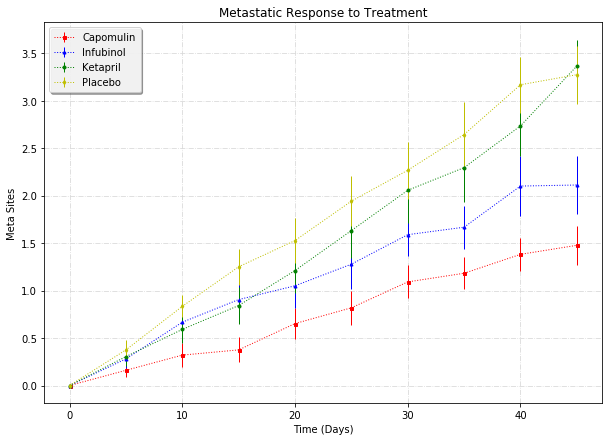

In [13]:
# Generate the Plot (with Error Bars)

fig= plt.figure(figsize=(10,7))
plt.title("Metastatic Response to Treatment")
plt.ylabel("Meta Sites")
plt.xlabel("Time (Days)")
plt.grid(linestyle='-.', color = '0.85')


plt.errorbar(Final_metastatic.index, Final_metastatic["Capomulin"],yerr=Final_MS_final["Capomulin"],color="r", marker="s", markersize=3, linestyle="dotted", linewidth=1)
plt.errorbar(Final_metastatic.index, Final_metastatic["Infubinol"], yerr=Final_MS_final["Infubinol"], color="b", marker="^", markersize=3, linestyle="dotted", linewidth=1)
plt.errorbar(Final_metastatic.index, Final_metastatic["Ketapril"], yerr=Final_MS_final["Ketapril"], color="g", marker="o", markersize=3, linestyle="dotted", linewidth=1)
plt.errorbar(Drug_final.index, Final_metastatic["Placebo"], yerr=Final_MS_final["Placebo"], color="y", marker="d", markersize=3, linestyle="dotted", linewidth=1)
             
plt.legend(("Capomulin", "Infubinol","Ketapril", "Placebo"),fancybox=True, framealpha=.85, shadow=True, borderpad=.5)

# fig, ax = plt.subplots()
# ax.plot()
# ax.xaxis.grid(True, which='minor')
# ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# Save the Figure
plt.savefig("Fig2_Pymaceut_HMWRK.png")

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_mouse_count = new_df_mouse.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
#df_mouse_count = df_mouse_count.rename(columns={"Mouse ID": "No.of Mice"})
df_mouse_count.to_frame()

# Minor Data Munging to Re-Format the Data Frames
Final_mouse = df_mouse_count.unstack(level = 0)
Final_mouse

#Num of Mice to Percent of Mice
Final_mouse_perc =(100. * Final_mouse / 25).round(1)
Final_mouse_perc

# Preview that Reformat
# Preview DataFrame

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


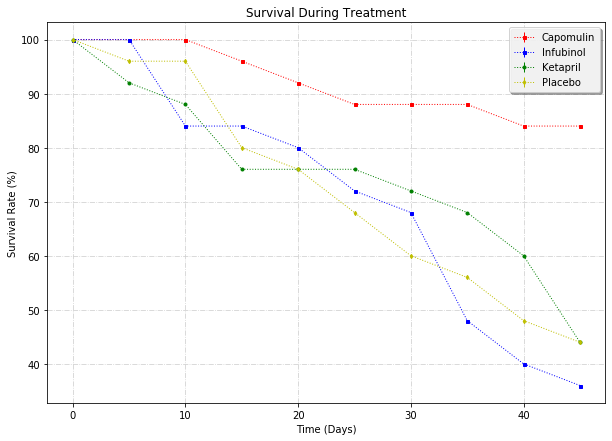

In [15]:
# Generate the Plot (Accounting for percentages)

fig= plt.figure(figsize=(10,7))
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(linestyle='-.', color = '0.82', which = 'both')


plt.errorbar(Final_mouse_perc.index, Final_mouse_perc["Capomulin"],yerr=0,color="r", marker="s", markersize=3, linestyle="dotted", linewidth=1)
plt.errorbar(Final_mouse_perc.index, Final_mouse_perc["Infubinol"], yerr=0,color="b", marker="s", markersize=3, linestyle="dotted", linewidth=1)
plt.errorbar(Final_mouse_perc.index, Final_mouse_perc["Ketapril"], yerr=0, color="g", marker="o", markersize=3, linestyle="dotted", linewidth=1)
plt.errorbar(Final_mouse_perc.index, Final_mouse_perc["Placebo"], yerr=0, color="y", marker="d", markersize=3, linestyle="dotted", linewidth=1)
             
plt.legend(("Capomulin", "Infubinol","Ketapril", "Placebo"),fancybox=True, framealpha=.85, shadow=True, borderpad=.5)

# Save the Figure
plt.savefig("Fig3_Pymaceut_HMWRK.png")
# Save the Figure

# Show the Figure
plt.show()

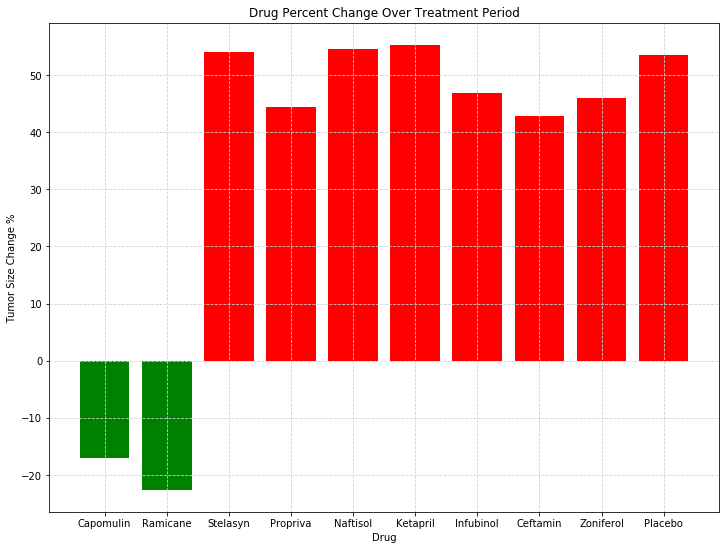

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate the percent changes for each drug

df_drug_shrink=[]
df_drug_enlarge=[]
pass_df=[]
fail_df=[]

drug_names = new_df_mouse["Drug"].unique()
for e in drug_names:
    drugs=new_df_mouse.loc[new_df_mouse["Drug"]==e,:].groupby("Timepoint").median()["Tumor Volume (mm3)"]
    delta_series=((drugs[45]/drugs[0])-1)*100
    
    if delta_series < 1:
        df_drug_shrink.append(delta_series)
        pass_df.append(e)
    else:
        df_drug_enlarge.append(delta_series)
        fail_df.append(e)  
       
        
# plt the bar chart with the percent change in tumor ize each drug achieved over its 45 day test


fig= plt.figure(figsize=(12,9))
plt.title("Drug Percent Change Over Treatment Period")
plt.ylabel("Tumor Size Change %")
plt.xlabel("Drug")
plt.grid(linestyle='--', color = '0.82', which = 'both')


plt.bar(pass_df, df_drug_shrink, color='g')
plt.bar(fail_df, df_drug_enlarge, color='r')


plt.show()
plt.savefig("Fig4_Pymaceut_HMWRK.png")


# Display the data to confirm
